In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Timeseries techniques for handling missing value
# https://www.kaggle.com/code/juejuewang/handle-missing-values-in-time-series-for-beginners

# https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [2]:
ls

Timeseries.ipynb    VehicleTraffic.csv


In [3]:
df = pd.read_csv('VehicleTraffic.csv')

In [4]:
df

,TimeStamp,Vehicles
0,12/4/2018 1:00,95
1,12/4/2018 2:00,90
2,12/4/2018 3:00,98
3,12/4/2018 4:00,98
4,12/4/2018 7:00,84
5,12/4/2018 8:00,82
6,12/4/2018 9:00,77
7,12/4/2018 10:00,93


In [5]:
df.dtypes

TimeStamp    object
Vehicles      int64
dtype: object

In [6]:
#make the timestamp column as index
df = pd.read_csv('VehicleTraffic.csv', parse_dates=[0], index_col=0)

In [7]:
df
#missing data from 5am and 6am

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [8]:
df.dtypes

Vehicles    int64
dtype: object

In [9]:
df.index[:5]

DatetimeIndex(['2018-12-04 01:00:00', '2018-12-04 02:00:00',
               '2018-12-04 03:00:00', '2018-12-04 04:00:00',
               '2018-12-04 07:00:00'],
              dtype='datetime64[ns]', name='TimeStamp', freq=None)

In [14]:
df.loc['2018']

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [15]:
df.loc['2018-12']

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [16]:
df.loc['2018-12-04 02':'2018-12-04 03']

,Vehicles
TimeStamp,
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98


In [17]:
df.loc['2018-12-04 02']

Vehicles    90
Name: 2018-12-04 02:00:00, dtype: int64

In [18]:
df.loc['2018-12-04 02':]

,Vehicles
TimeStamp,
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


<Axes: xlabel='TimeStamp'>

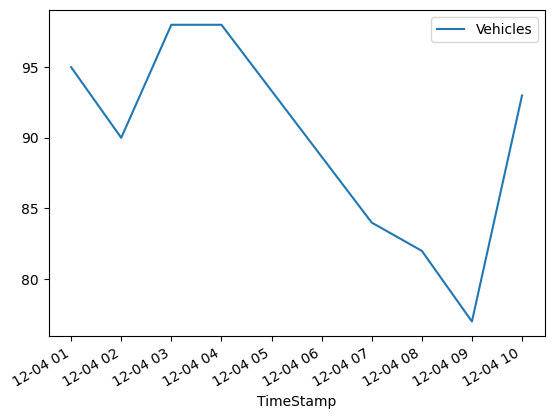

In [19]:
df.plot()
#df.plot(style='bo')

In [20]:
df.index.min()

Timestamp('2018-12-04 01:00:00')

In [21]:
list(df.Vehicles)

[95, 90, 98, 98, 84, 82, 77, 93]

In [22]:
df

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [24]:
#missing data of 5am and 6am. So we do resampling the data by 1hour frequency.
df.resample('1h').mean()

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


In [25]:
df_resampled = df.resample('1h').mean()

In [26]:
df_resampled

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


<Axes: xlabel='TimeStamp'>

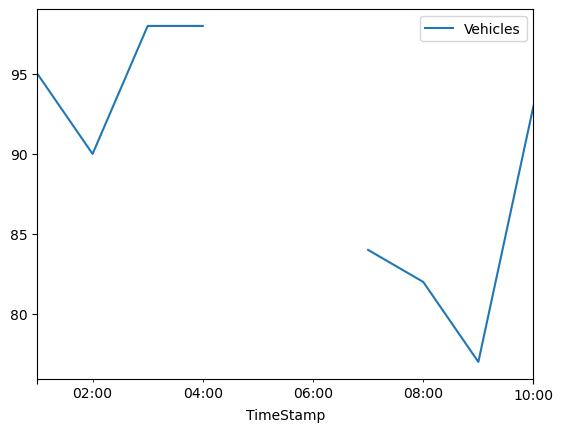

In [27]:
# Temperature for two time steps are missing
df_resampled.plot()

In [28]:
df_resampled.index.min()

Timestamp('2018-12-04 01:00:00')

In [29]:
list(df_resampled.Vehicles)

[95.0, 90.0, 98.0, 98.0, nan, nan, 84.0, 82.0, 77.0, 93.0]

<h2>Working With Missing Data</h2>
https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [30]:
df_resampled

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


In [31]:
# Forward Fill values
df_resampled['ffill'] = df_resampled['Vehicles'].fillna(method='ffill')
# Back fill values
df_resampled['bfill'] = df_resampled['Vehicles'].fillna(method='bfill')
# Interpolate missing values
# Linear
df_resampled['linear'] = df_resampled['Vehicles'].interpolate()
df_resampled['quadratic'] = df_resampled['Vehicles'].interpolate(method='quadratic')

In [32]:
df_resampled

,Vehicles,ffill,bfill,linear,quadratic
TimeStamp,,,,,
2018-12-04 01:00:00,95.0,95.0,95.0,95.000000,95.000000
2018-12-04 02:00:00,90.0,90.0,90.0,90.000000,90.000000
2018-12-04 03:00:00,98.0,98.0,98.0,98.000000,98.000000
2018-12-04 04:00:00,98.0,98.0,98.0,98.000000,98.000000
2018-12-04 05:00:00,NaN,98.0,84.0,93.333333,93.898529
2018-12-04 06:00:00,NaN,98.0,84.0,88.666667,87.719892
2018-12-04 07:00:00,84.0,84.0,84.0,84.000000,84.000000
2018-12-04 08:00:00,82.0,82.0,82.0,82.000000,82.000000
2018-12-04 09:00:00,77.0,77.0,77.0,77.000000,77.000000


<Axes: xlabel='TimeStamp'>

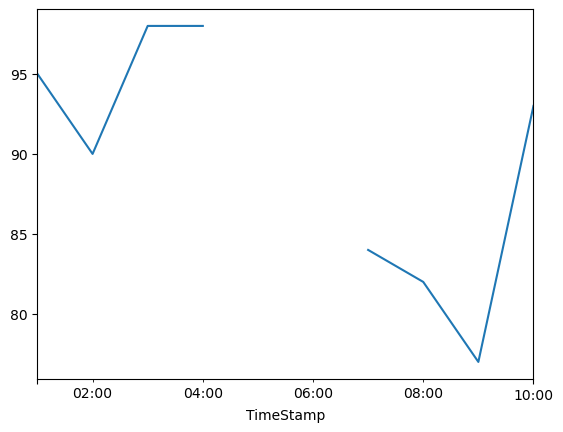

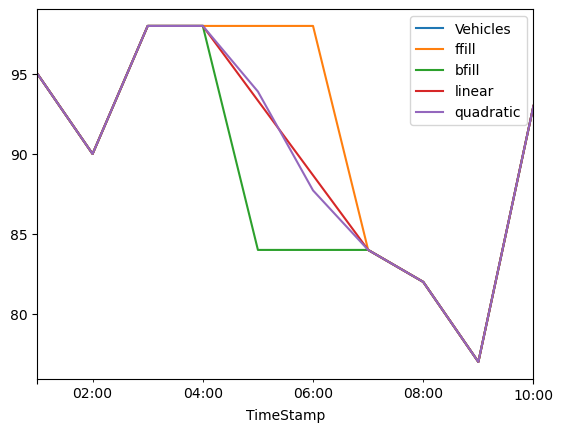

In [33]:
df_resampled['Vehicles'].plot()
df_resampled.plot()

# Summary
1. We have a few method to fill in the missing values
2. Method used in this case is forward filling, back filling, linear interpolation and quadratic interpolation
3. In practive, forward filling usually being used.